In [1]:
import pandas as pd

df = pd.read_csv("/home/work/gnssl/boston.csv")

df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/work/gnssl/boston.csv'

In [2]:
# 시간 측정
import time
start = time.time()

In [30]:
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
preprocessing.LabelEncoder()
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
# TensorFlow가 GPU를 인식하는지 확인
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print(f'GPUs {len(gpus)} detected: {gpus}')
    try:
        # 모든 GPU 메모리 증가 허용
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(f'{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPUs')
    except RuntimeError as e:
        # 프로그램 시작 시 GPU 설정은 반드시 설정되어야 합니다.
        print(e)
else:
    print("No GPUs detected")

GPUs 2 detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
2 Physical GPUs, 2 Logical GPUs


2024-06-28 10:22:23.665478: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38698 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:48:00.0, compute capability: 8.0
2024-06-28 10:22:23.667732: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38698 MB memory:  -> device: 1, name: CUDA GPU, pci bus id: 0000:88:00.0, compute capability: 8.0


In [5]:
df.shape

(506, 14)

In [6]:
df.isnull().values.any()

False

In [7]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [27]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


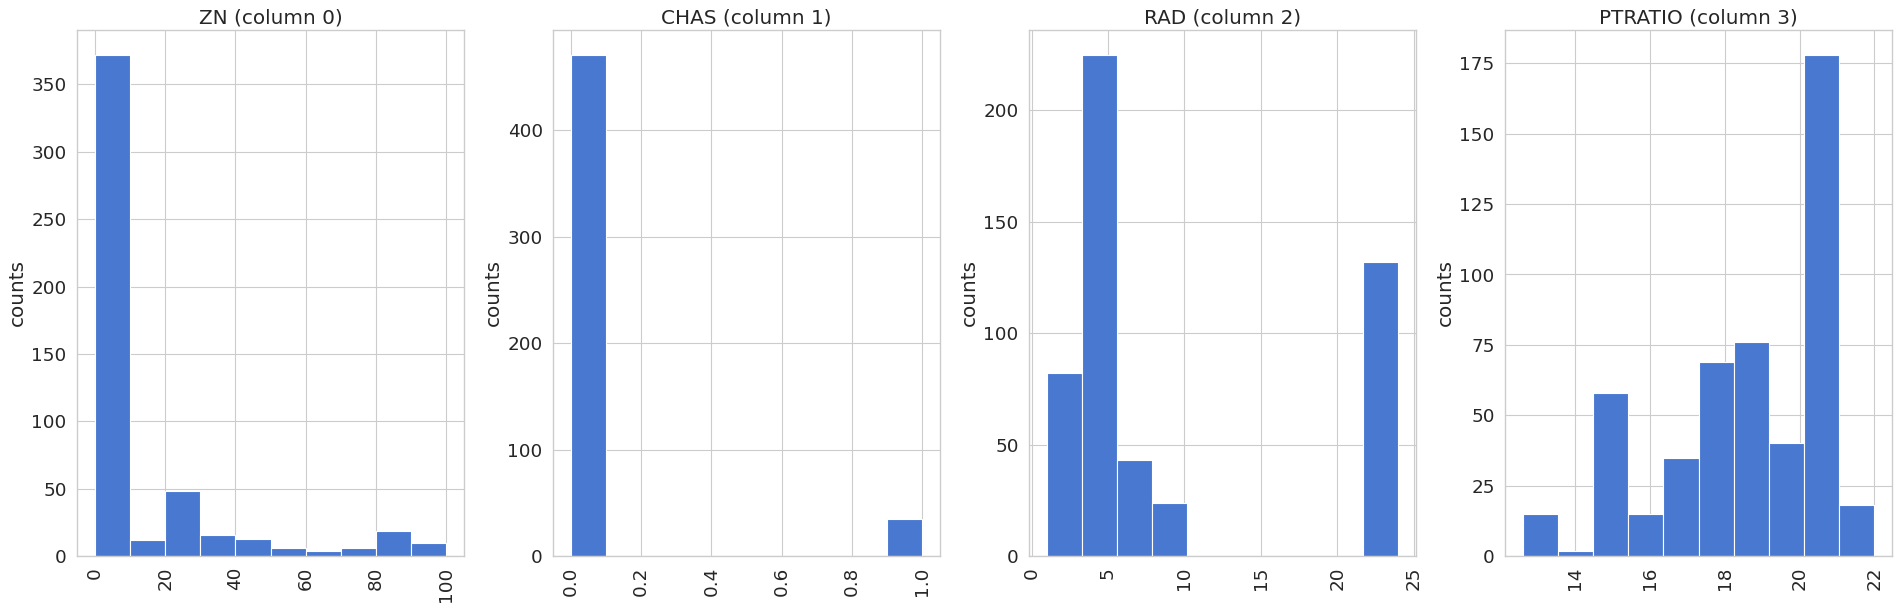

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
    
plotPerColumnDistribution(df, 79, 5)

In [9]:
df_corr=df.corr()

print(df_corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [10]:
df_corr.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

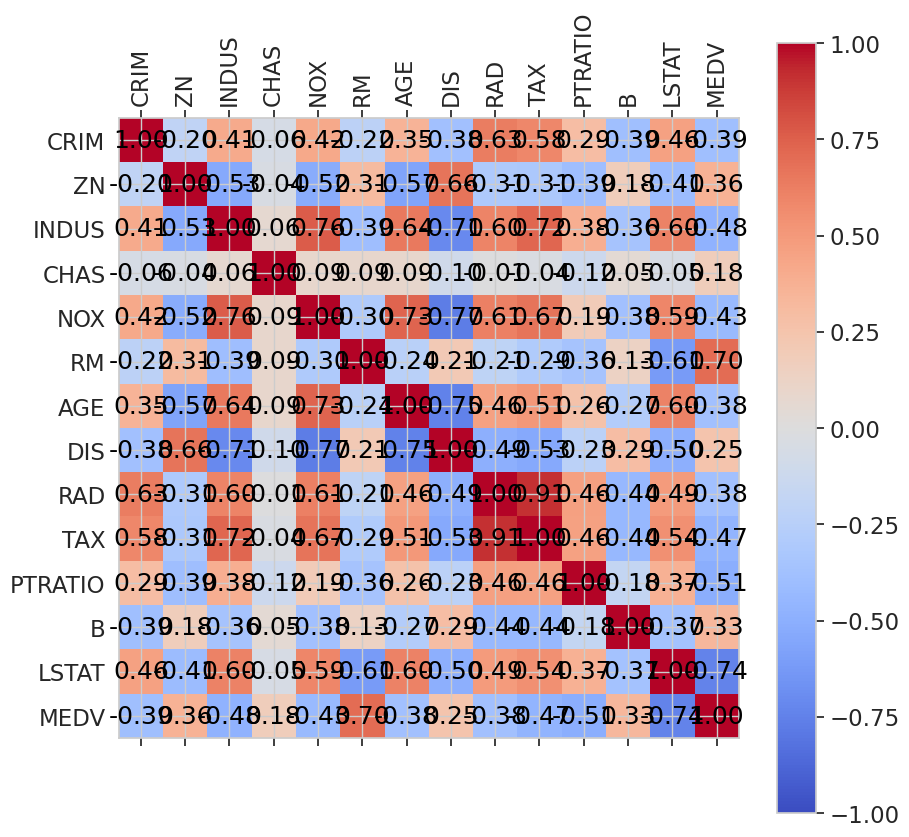

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(df_corr, cmap='coolwarm', vmin=-1, vmax=1)

plt.xticks(range(len(df_corr.columns)), df_corr.columns, rotation=90)
plt.yticks(range(len(df_corr.index)), df_corr.index)

# Adding color bar
fig.colorbar(cax)

# Adding the annotations
for (i, j), val in np.ndenumerate(df_corr):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.show()

In [12]:
df['MEDV'].value_counts()

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: MEDV, Length: 229, dtype: int64

In [13]:
x = df.drop(labels='MEDV',axis=1)
print(x)
print(x.columns)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [14]:
y = df["MEDV"]
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [33]:
def encoding(dataset): # encoding strings
    labelE = LabelEncoder()
    columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
    t_df[columns] = dataset[columns].apply(labelE.fit_transform)

In [37]:
from sklearn.preprocessing import LabelEncoder

t_df = df
encoding(t_df)
t_x = t_df.drop(labels='MEDV',axis=1)
t_y = t_df['MEDV']

In [40]:
t_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,3,19,0,51,320,172,297,0,34,9,356,53
1,23,0,56,0,36,279,225,333,1,11,23,356,161
2,22,0,56,0,36,400,159,333,1,11,23,271,28
3,32,0,16,0,33,383,112,361,2,5,31,311,6
4,110,0,16,0,33,395,139,361,2,5,31,356,64


In [41]:
x_train , x_test , y_train , y_test = train_test_split(t_x , t_y)

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier() 
dt_clf.fit(x_train, y_train) 
pred = dt_clf.predict(x_test) 

ValueError: Unknown label type: 'continuous'

In [ ]:
print ("Accuracy : " , accuracy_score(y_test,prediction)*100)
print("Report : \n", classification_report(y_test, prediction))

print("F1 Score : ",f1_score(y_test, prediction, average='macro')*100)
print("Confusion Matrix :\n" , confusion_matrix(y_test,prediction)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def calculate_accuracy(x , y): # LGBM checks accuracies
    X = df[x]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=30)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Mean Squared Error:', mse)
    print('R^2 Score:', r2)
    return mse
    
    return accuracy

In [16]:
columnsName=df.columns.values.tolist()

print(columnsName)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [17]:
# chromosome 생성
import random

columnsName1=[0,1]
chromosomes=[]
for i in range(10):
    chro1=[]
    for i in range(13):
        item = random.choice(tuple(columnsName1))
        chro1.append(item)
    chromosomes.append(chro1)

In [18]:
def data(chromosomes1):
    chromosomes2=[]
    for i in range(len(chromosomes1)):
        if chromosomes1[i]!=1:
                chromosomes2.append(columnsName[i])
    print(chromosomes2)
    return chromosomes2

In [25]:
def checkvelocity(globalbest, pbest, omega=0.5, c1=1.5, c2=1.5):
    velocity = []
    for j in range(len(chromosomes)):
        new_velocity = []
        for k in range(len(chromosomes[j])):
            r1 = np.random.random()
            r2 = np.random.random()
            cognitive_component = c1 * r1 * (pbest[k] - chromosomes[j][k])
            social_component = c2 * r2 * (globalbest[k] - chromosomes[j][k])
            new_velocity_k = omega * velocities[j][k] + cognitive_component + social_component
            new_velocity.append(new_velocity_k)
        velocity.append(new_velocity)
    print(f"velocity is : {velocity}")
    return velocity

In [20]:
def addingchromosomes(velocity):
    chromosomes2=[]
    for i in range(len(velocity)):
        nextchromo=[]
        for j in range(len(velocity[i])):
            nextchromo.append(chromosomes[i][j]+velocity[i][j])
        chromosomes2.append(nextchromo)
    return chromosomes2

In [21]:
def normalize(chromosomes2):
    for l in range(len(chromosomes2)):
        for m in range(len(chromosomes2[l])):
            if chromosomes2[l][m]>0.5:
                chromosomes2[l][m]=1
            else:
                chromosomes2[l][m]=0
    return chromosomes2

In [22]:
def checkpd(chromosomes2):
    personal = []
    for i in range(len(chromosomes2)):
        accuracy = calculate_accuracy(data(chromosomes2[i]))
        personal.append(accuracy)
        if accuracy > pb[i]:
            pb[i] = accuracy
            pbest[i] = chromosomes2[i][:]  # 더 나은 경우 개인 최적 위치 업데이트
    return personal

In [23]:
pb=[]
pbest=[]
def checkpersonalnest():
    for i in range(len(chromosomes)):
        pb.append(calculate_accuracy(data(chromosomes[i]),y))
        pbest.append(chromosomes[i])
checkpersonalnest()

['CHAS', 'AGE', 'RAD', 'PTRATIO', 'B']
Mean Squared Error: 54.3285778643601
R^2 Score: 0.3435078246059353
['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'B', 'LSTAT']
Mean Squared Error: 33.72690186712942
R^2 Score: 0.5924530321531043
['INDUS', 'NOX', 'RM', 'DIS', 'PTRATIO']
Mean Squared Error: 36.743546667706354
R^2 Score: 0.556000693708569
['ZN', 'INDUS', 'DIS', 'RAD', 'B']
Mean Squared Error: 58.28768649283086
R^2 Score: 0.2956670023665735
['NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B']
Mean Squared Error: 46.706862170568535
R^2 Score: 0.43560662256351446
['INDUS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
Mean Squared Error: 30.076207426460755
R^2 Score: 0.6365670588636362
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'LSTAT']
Mean Squared Error: 35.56694099428696
R^2 Score: 0.5702184856789864
['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'TAX', 'B']
Mean Squared Error: 41.912036190451424
R^2 Score: 0.49354603239275674
['CRIM', 'INDUS', 'CHAS', 'RM']
Mean Squared Error: 42.9856052483944
R^2 Score: 0.480573

In [26]:
max(pb)
ind = pb.index(max(pb))
globalbest=chromosomes[ind]
for i in range(10):
    chromosomes2=[]
    print(f"init_chromosome : {chromosomes2}")
    personal=[]
    velocity=checkvelocity(globalbest,pb)
    print(f"velocity : {velocity}")
    chromosomes2=addingchromosomes(velocity)
    print(f"adding chromosmes run : {chromosomes2}")
    chromosomes2=normalize(chromosomes2)
    print(f"normalize chromosomes : {chromosomes2}")
    personal=checkpd(chromosomes2)
    print(f"check pd : {chromosomes2}")
    globalbest=[]
    print(f"pb : {pb}")
    max(pb)
    ind = pb.index(max(pb))
    globalbest=chromosomes[ind]

init_chromosome : []


NameError: name 'velocities' is not defined

In [ ]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x = sequences.iloc[i:end_ix, :-1]
        seq_y = sequences.iloc[end_ix-1, -1]
        X.append(seq_x.values)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
X,y = split_sequences(df,3)
print(X)
print(y)

In [ ]:
end = time.time()
print(f"time : {end-start}")